In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [350]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-alekseev-38/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')

In [285]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [286]:
df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [287]:
df_all = df.groupby('ad_id')['event'].value_counts().unstack().fillna(0).round(0)
df_all.sort_values('view')

event,click,view
ad_id,,
41500,20.0,0.0
19223,7.0,0.0
117364,7.0,0.0
45418,3.0,0.0
115825,4.0,0.0
...,...,...
45008,11.0,19668.0
28142,38.0,24152.0
107837,26.0,51996.0


In [288]:
df_view_log = np.log(ad_counts.index + 1e-9)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


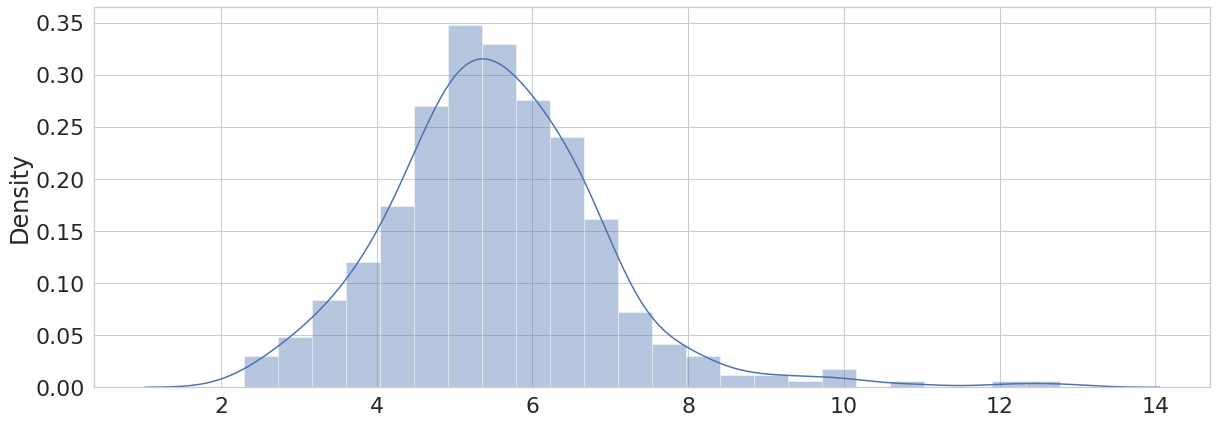

In [289]:
sns.distplot(df_view_log)

In [290]:
daily_ad_counts = df[df['event'] == 'view'].groupby(['date', 'ad_id']).size().reset_index(name='counts')
daily_ad_counts
daily_ad_means = daily_ad_counts.groupby('date')['counts'].mean()

In [291]:
rolling_means = daily_ad_means.rolling(window=2).mean()

In [292]:
rolling_means

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
Name: counts, dtype: float64

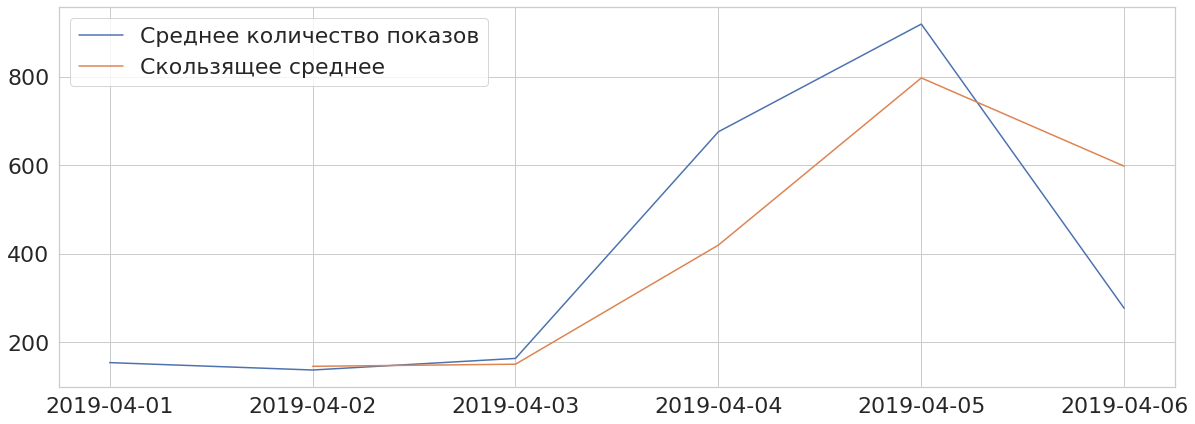

In [293]:
plt.plot(daily_ad_means.index, daily_ad_means.values, label='Среднее количество показов')
plt.plot(rolling_means.index, rolling_means.values, label='Скользящее среднее')
plt.legend()
plt.show()

In [294]:
diff = abs(daily_ad_means - rolling_means)
diff_max = diff.dropna().idxmax()

In [295]:
diff_max

'2019-04-06'

In [351]:
df_client = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-alekseev-38/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [297]:
df_client

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [352]:
df = df.merge(df_client, on='client_union_id')

In [353]:
df.create_date = pd.to_datetime(df.create_date)

In [347]:
df.date_x = df.date_x.dropna()
df.client_union_id.nunique()

838

In [354]:
df.date_x = pd.to_datetime(df.date_x)

In [355]:
df['days_since_created'] = (df['date_x'] - df['create_date']).dt.days

In [303]:
df

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,days_since_created
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31


In [386]:
df['first_advertising'] = df.groupby('client_union_id').apply(lambda x: (x['date_x'].min() - x['create_date'].min()))
df.dtypes

date_x                    datetime64[ns]
time                              object
event                             object
platform                          object
ad_id                              int64
client_union_id                    int64
campaign_union_id                  int64
ad_cost_type                      object
ad_cost                          float64
has_video                          int64
target_audience_count              int64
date_y                            object
community_id                       int64
create_date               datetime64[ns]
days_since_created                 int64
first_advertising        timedelta64[ns]
days_category                   category
dtype: object

In [334]:
df

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,days_since_created,first_advertising,days_category
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118,NaN,NaN
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118,98.0,0-30
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118,NaN,NaN
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118,NaN,NaN
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31,NaN,NaN
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31,NaN,NaN
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31,NaN,NaN
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31,NaN,NaN


In [365]:
bins = pd.to_timedelta([0, 30, 90, 180, 365], unit='D')

In [385]:
df.first_advertising.sort_values().head(20).nunique()

8

In [366]:
df['days_category'] = pd.cut(df['first_advertising'], bins=bins, labels=['0-30', '30-90', '90-180', '180-365'])

In [367]:
df[df['days_category'] == '0-30']['client_union_id'].nunique()

2

In [375]:
df[df['days_category'] == '0-30']['client_union_id']

2137          37
14606     111818
21194     111818
24853     111818
27420     111818
38094     111818
98415     111818
108678    111818
110442    111818
114880    111818
116173    111818
Name: client_union_id, dtype: int64

In [387]:
fig = px.bar(df, x=df.days_category.values, y=df.days_category.index, orientation='h',
             title='Частота задержек сделок', height=400, width=600)
fig.update_layout(xaxis_title='Число записей', yaxis_title='Задержка')
fig.show()

NameError: name 'px' is not defined